### This is an introduction to Machine Learning with Python's Scikit Learning Package

We will be working on the handwritten digits dataset to fit models later predicting the digits

In [16]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the .data member, which is a n_samples, n_features array. In the case of supervised problem, one or more response variables are stored in the .target member. 

In [3]:
# n_samples is basically the rows and n_features are the columns.
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# Lets try it for the digits dataset
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [9]:
# digits.target gives the ground truth for the digit dataset, that is the number corresponding to each digit image 
# that we are trying to learn:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

### Shape of the data arrays
The data is always a 2D array, shape (n_samples, n_features), although the original data may have had a different shape. 
In the case of the digits, each original sample is an image of shape (8, 8) and can be accessed using:

In [10]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

### Learning and predicting
In the case of the digits dataset, the task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.

In scikit-learn, an estimator for classification is a Python object that implements the methods fit(X, y) and predict(T).

An example of an estimator is the class sklearn.svm.SVC that implements support vector classification. The constructor of an estimator takes as arguments the parameters of the model, but for the time being, we will consider the estimator as a black box:

In [11]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

### Choosing the parameters of the model
In this example we set the value of gamma manually. It is possible to automatically find good values for the parameters by using tools such as grid search and cross validation.

We call our estimator instance 'clf', as it is a classifier. It now must be fitted to the model, that is, it must learn from the model. This is done by passing our training set to the fit method. As a training set, let us use all the images of our dataset apart from the last one. We select this training set with the [:-1] Python syntax, which produces a new array that contains all but the last entry of digits.data:

In [12]:
# Target is the feature that is to be predicted. Here, data would be our x and target would be our y. We are taking
# training data from both x and y and we then try to fit our estimator on it. Not that clf is an instance of our estimator.
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now you can predict new values, in particular, the digit of our last image in the digits dataset, which we have not used to train the classifier: i.e. we have kept that aside as our test data. Usually we go by the 80-20 rule where 80% of our data would be used for training and 20% for testing. Anyways, for this tutorial, we are going with a 90-10 model cos our sample size is very little and we need a significantly large data set to train our model.

In [13]:
# Now lets try and predict the last digit
clf.predict(digits.data[-1:])

array([8])

The prediction says that its an "8". Lets see what our actual digit is

In [15]:
digits.data[-1:]

array([[  0.,   0.,  10.,  14.,   8.,   1.,   0.,   0.,   0.,   2.,  16.,
         14.,   6.,   1.,   0.,   0.,   0.,   0.,  15.,  15.,   8.,  15.,
          0.,   0.,   0.,   0.,   5.,  16.,  16.,  10.,   0.,   0.,   0.,
          0.,  12.,  15.,  15.,  12.,   0.,   0.,   0.,   4.,  16.,   6.,
          4.,  16.,   6.,   0.,   0.,   8.,  16.,  10.,   8.,  16.,   8.,
          0.,   0.,   1.,   8.,  12.,  14.,  12.,   1.,   0.]])

In [26]:
plt.imshow(digits.images[10])

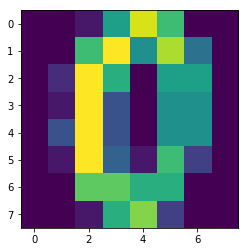

In [27]:
plt.show()

### Ooooh that's an 8??? Doesn't  look so. Lets try and print another image.

In [28]:
plt.imshow(digits.images[1])

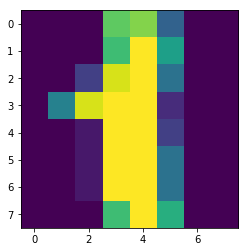

In [29]:
plt.show()

### Now that looks like a "1"

### Alright so we can all agree that it is a challenging task: the images are of poor resolution.

### Model persistence Using Picke
It is possible to save a model in the scikit by using Python’s built-in persistence model, namely pickle:

In [30]:
import pickle

In [32]:
# Saving our model (the estimator) as a pickle
s = pickle.dumps(clf)

In [33]:
# How to load it later??
clf2 = pickle.loads(s)

In [45]:
clf2.predict(digits.data[407])

C:\Users\rhomi\Anaconda2\envs\data\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

Well, it says its a "One". Lets just see if it's right shall we??

In [49]:
plt.imshow(digits.images[407])

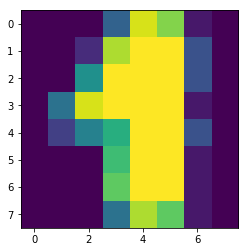

In [50]:
plt.show()

### Now, that's pretty spot on!!!

### A little tip on using Pickle
Note that pickle has some security and maintainability issues.
In the specific case of the scikit, it may be more interesting to use joblib’s replacement of pickle (joblib.dump & joblib.load), which is more efficient on big data, but can only pickle to the disk and not to a string:

### This is how we do it.

For more info on joblib refer https://pythonhosted.org/joblib/persistence.html
For more info on model persistence refer http://scikit-learn.org/stable/modules/model_persistence.html#model-persistence